# Semivariogram Models

In [1]:
import svmodels


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = [16 / 1.5, 10 / 1.5]   # inch / cm = 2.54
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

sill: 1.00, lag: 2500.00


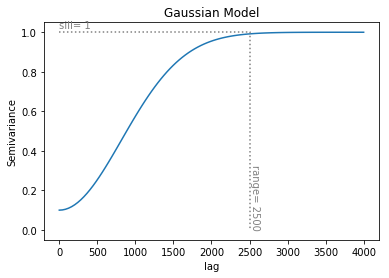

In [47]:
a = 2500
C0 = 1
Cn = 0.1
X = np.linspace(0,4000,100)
Y = svmodels.gaussian(X, 2000, 1, 0.1)
plt.title('Gaussian Model')
plt.ylabel('Semivariance')
plt.xlabel('lag')
plt.plot(X,Y)
#plt.plot((0),(0))
plt.plot((0,a,a),(C0,C0,0), ":", c="grey")
plt.text(0,C0+0.02,"sill= {:}".format(C0),color="grey")
plt.text(a,0,"range= {:}".format(a), rotation=270, verticalalignment='bottom',color="grey")

print("sill: {:.2f}, lag: {:.2f}".format(C0,a))


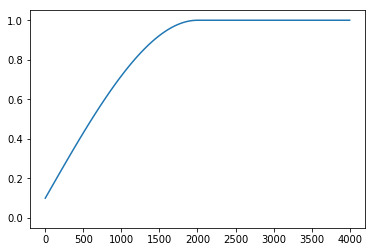

In [4]:
X = np.linspace(0,4000,100)
Y = svmodels.spherical(X, 2000, 1, 0.1)
plt.plot(X,Y)
plt.plot((0),(0))

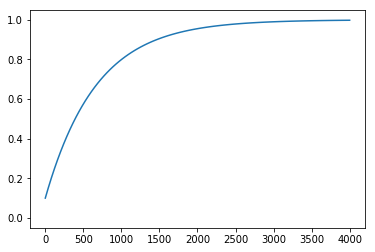

In [5]:
X = np.linspace(0,4000,100)
Y = svmodels.exponential(X, 2000, 1, 0.1)
plt.plot(X,Y)
plt.plot((0),(0))

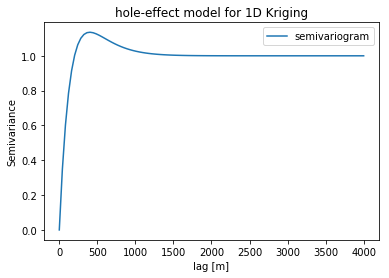

In [26]:
X = np.linspace(0,4000,100)
Y = svmodels.hole(X, 200, 1, 0.0)
plt.title('hole-effect model for 1D Kriging')
plt.ylabel('Semivariance')
plt.xlabel('lag')
plt.plot(X,Y, label="semivariogram")
plt.plot((0),(0))
plt.legend()


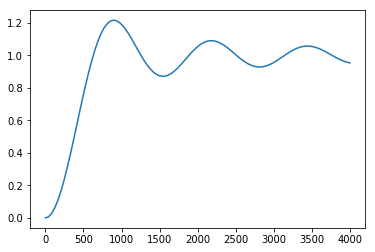

In [27]:
X = np.linspace(0,4000,100)
Y = svmodels.hole_N(X, 200, 1, 0.0)
plt.plot(X,Y)
plt.plot((0),(0))

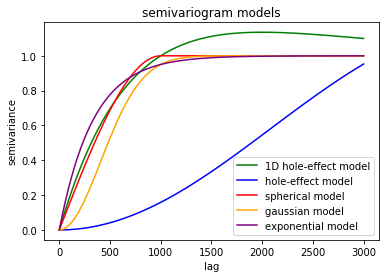

In [24]:
X = np.linspace(0,3000,100)
Y = svmodels.hole(X, 1000, 1, 0.0)
Y1= svmodels.hole_N(X, 1000, 1, 0.0)
Y2= svmodels.spherical(X, 1000, 1, 0.0)
Y3= svmodels.gaussian(X, 1000, 1, 0.0)
Y4= svmodels.exponential(X, 1000, 1, 0.0)
plt.title('semivariogram models')
plt.ylabel('semivariance')
plt.xlabel('lag')
plt.plot(X,Y, color='green', label="1D hole-effect model")
plt.plot(X,Y1, color='blue', label="hole-effect model")
plt.plot(X,Y2, color='red', label="spherical model")
plt.plot(X,Y3, color='orange', label="gaussian model")
plt.plot(X,Y4, color='purple', label="exponential model")

plt.plot((0),(0))
plt.legend()
plt.savefig('semivariogram_models_small.png',fmt='png',dpi=200)

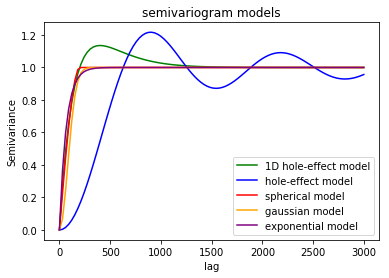

In [25]:
X = np.linspace(0,3000,100)
Y = svmodels.hole(X, 200, 1, 0.0)
Y1= svmodels.hole_N(X, 200, 1, 0.0)
Y2= svmodels.spherical(X, 200, 1, 0.0)
Y3= svmodels.gaussian(X, 200, 1, 0.0)
Y4= svmodels.exponential(X, 200, 1, 0.0)
plt.title('semivariogram models')
plt.ylabel('Semivariance')
plt.xlabel('lag')
plt.plot(X,Y, color='green', label="1D hole-effect model")
plt.plot(X,Y1, color='blue', label="hole-effect model")
plt.plot(X,Y2, color='red', label="spherical model")
plt.plot(X,Y3, color='orange', label="gaussian model")
plt.plot(X,Y4, color='purple', label="exponential model")
plt.plot((0),(0))
plt.legend()
plt.savefig('semivariogram_models_big.png',fmt='png',dpi=200)